<a href="https://colab.research.google.com/github/parsamirzakhani/ai4032_parsa_mirzakhani/blob/main/THE_REAL_MINI_PROJECT_1_PARSAMIRZAKHANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*info*:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

*describe*:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     25

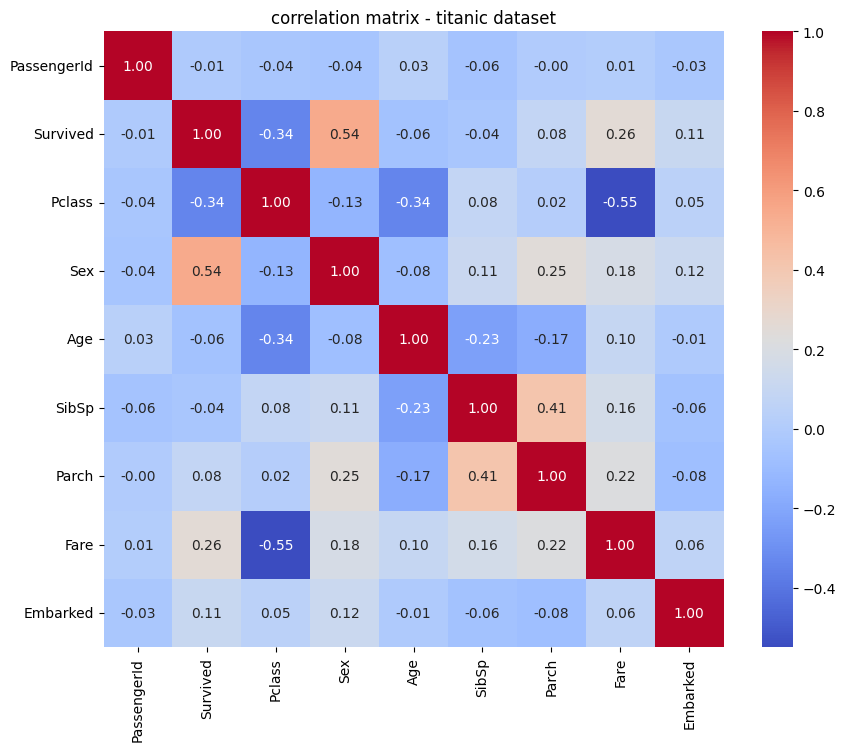

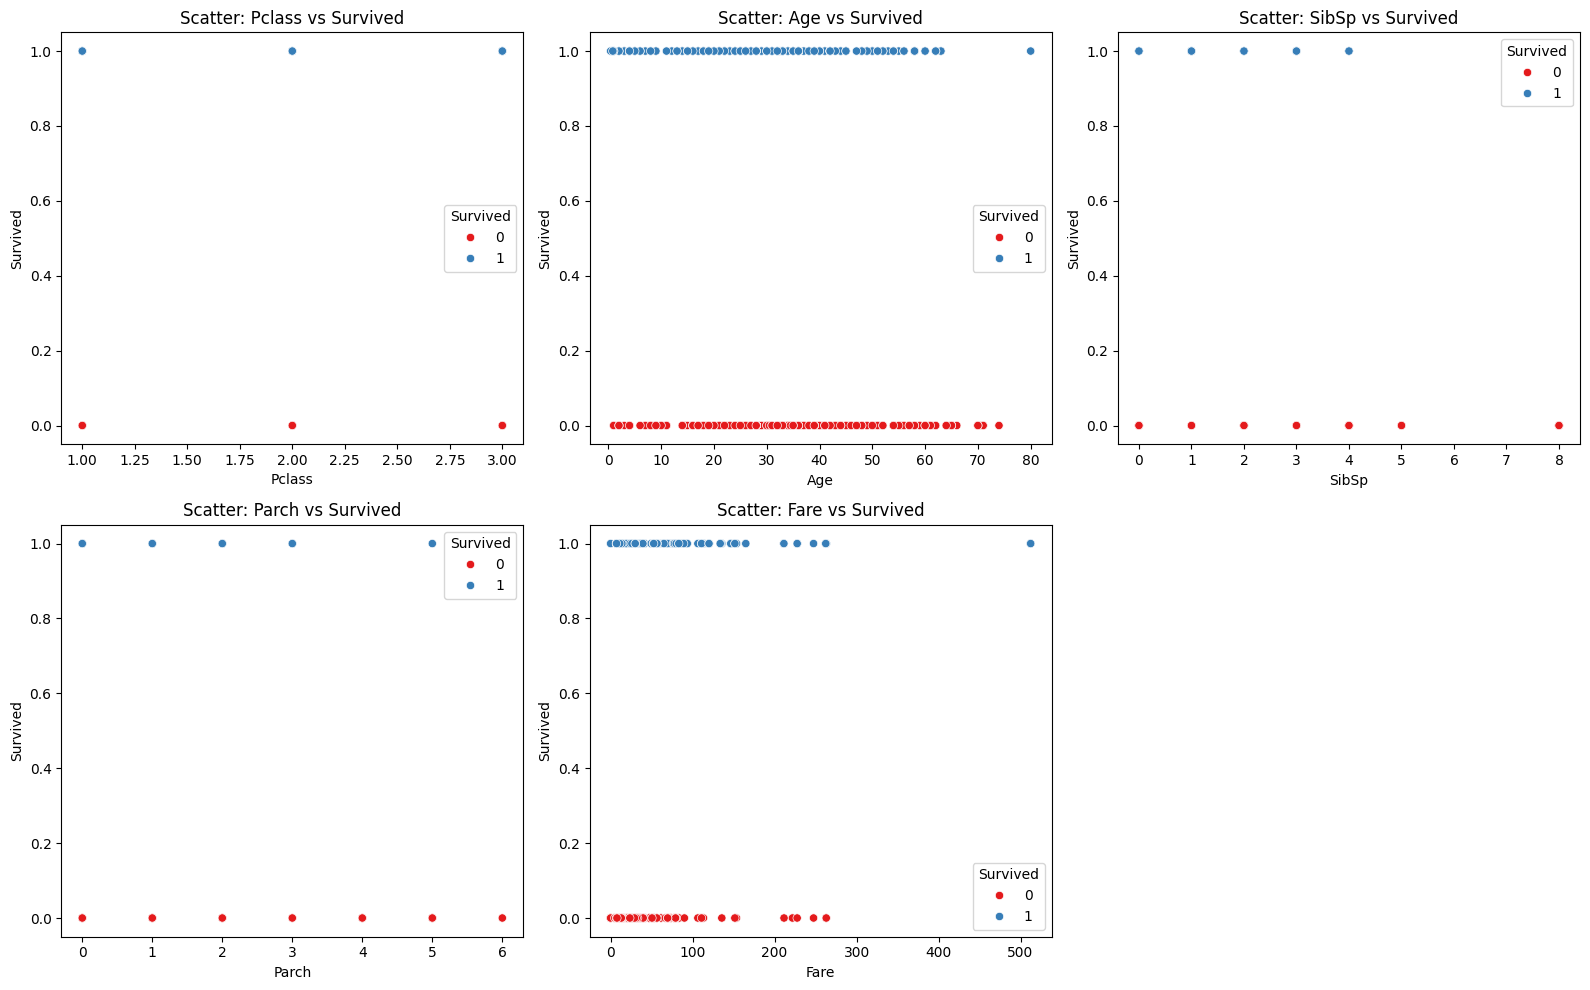

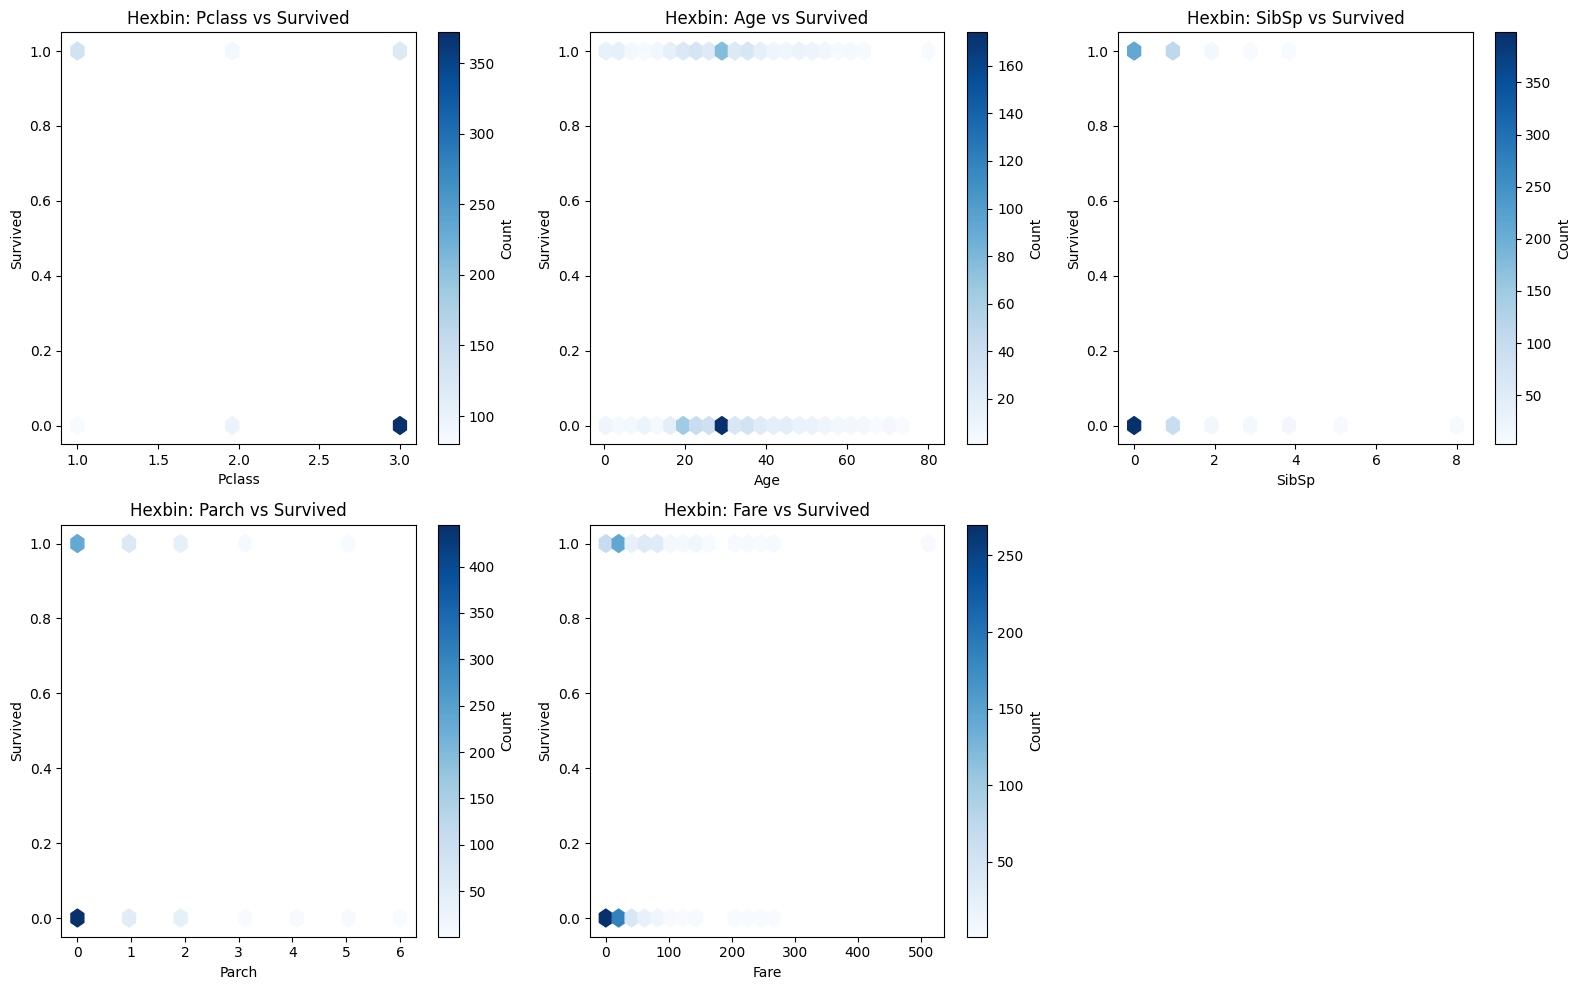

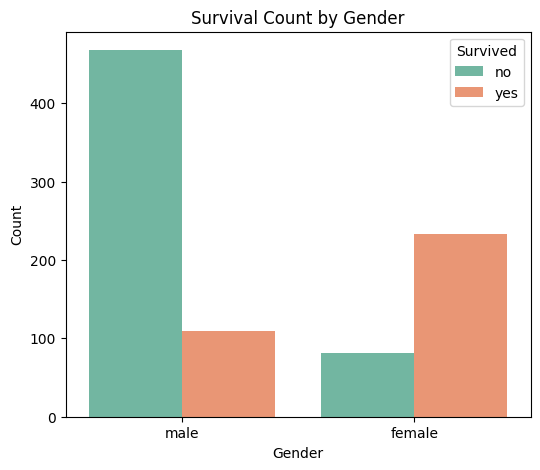

In [10]:
#1.1.1
import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv"
df = pd.read_csv(path)
print("\n*info*:\n")
df.info()
print("\n*describe*:\n")
print(df.describe())
#1.1.2
import matplotlib.pyplot as plt
import seaborn as sns
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_encoded = df_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].median())
df_encoded['Embarked'] = df_encoded['Embarked'].fillna(df_encoded['Embarked'].mode()[0])

corr_matrix = df_encoded.corr()
corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title("correlation matrix - titanic dataset")
plt.show()

#1.1.3
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'
df['Age'] = df['Age'].fillna(df['Age'].median())


plt.figure(figsize=(16, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y=target, hue=target, palette='Set1')
    plt.title(f'Scatter: {feature} vs {target}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    plt.hexbin(df[feature], df[target], gridsize=25, cmap='Blues', mincnt=1)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Hexbin: {feature} vs {target}')
    plt.colorbar(label='Count')
plt.tight_layout()
plt.show()


#1.1.3

import plotly.express as px
fig = px.scatter(
    df,
    x='Age',
    y='Fare',
    color='Survived',
    title='Scatter plot of fare vs age',
    labels={'Survived': 'Survived (1 = yes, 0 = No)'},
    hover_data=['Sex', 'Pclass']
)
fig.show()


plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['no', 'yes'])
plt.show()




<ipython-input-12-370e64e0ee0d>:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



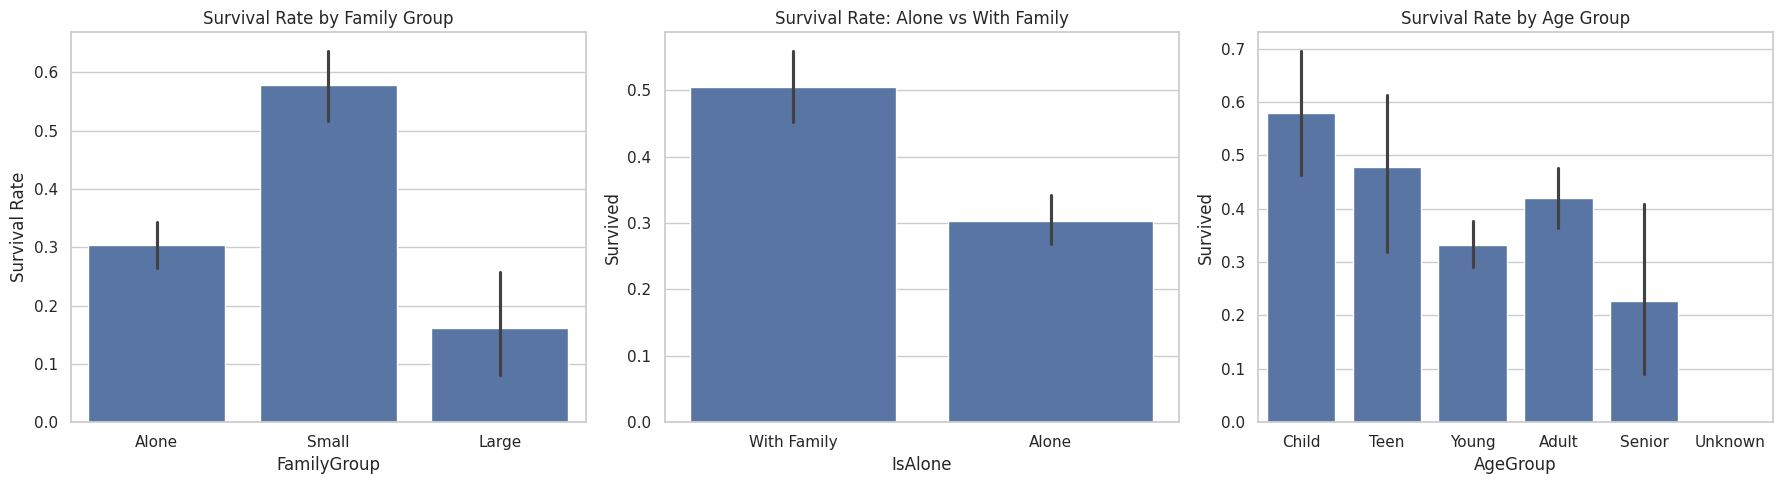

In [12]:
#1.2.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FamilyGroup'] = pd.cut(
    df['FamilySize'],
    bins=[0, 1, 4, 11],
    labels=['Alone', 'Small', 'Large']
)

def age_group(age):
    if pd.isna(age): return 'unknown'
    elif age <= 12: return 'child'
    elif age <= 17: return 'teen'
    elif age <= 30: return 'young'
    elif age <= 60: return 'adult'
    else: return 'senior'

df['AgeGroup'] = df['Age'].apply(age_group)

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x='FamilyGroup', y='Survived', ax=axes[0])
axes[0].set_title('Survival Rate by Family Group')
axes[0].set_ylabel('Survival Rate')

sns.barplot(data=df, x='IsAlone', y='Survived', ax=axes[1])
axes[1].set_title('survival Rate Alone vs With Family')
axes[1].set_xticklabels(['With Family', 'Alone'])

age_order = ['child', 'teen', 'young', 'adult', 'senior', 'unknown']
sns.barplot(data=df, x='AgeGroup', y='Survived', order=age_order, ax=axes[2])
axes[2].set_title('survival rate by age group')

plt.tight_layout()
plt.show()


In [15]:
#2.1
missing_counts = df.isnull().sum()
missing_ratio = (missing_counts / len(df)) * 100
print("missing values:\n", pd.concat([missing_counts, missing_ratio], axis=1, keys=["count", "percent"]))

#روش اول
df_cleaned = df.dropna(subset=['Embarked'])
#روش دوم
df['Age'] = df['Age'].fillna(df['Age'].median())




missing values:
              count    percent
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age              0   0.000000
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467
FamilySize       0   0.000000
FamilyGroup      0   0.000000
IsAlone          0   0.000000
AgeGroup         0   0.000000


lasso ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
RFE ['Pclass', 'Sex', 'Age', 'SibSp']
اجتماع ['Embarked', 'Age', 'Sex', 'Parch', 'Fare', 'Pclass', 'SibSp']
AUC: 0.8323412698412699


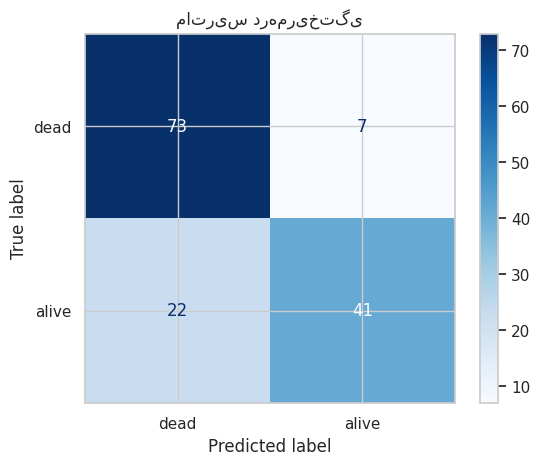

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve


df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna()

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=0).fit(X_train_scaled, y_train)
lasso_mask = lasso.coef_ != 0
lasso_features = X.columns[lasso_mask]

rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=4)
rfe.fit(X_train_scaled, y_train)
rfe_features = X.columns[rfe.support_]

print("lasso", list(lasso_features))
print("RFE", list(rfe_features))
print("اجتماع", list(set(lasso_features) | set(rfe_features)))




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)

print("AUC:", auc)



import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["dead" , "alive"])
disp.plot(cmap="Blues")
plt.title("ماتریس درهم‌ریختگی")
plt.show()


      1     2     3     4     5     6     7     8     9    10  ...   1991  \
0    13    29    44    55    61    72   200    96   112   120  ...  21680   
1 -3980 -3883 -3832     0 -3839 -3788 -3695 -3663 -3669     0  ...   7130   
2 -3959 -4058 -4131 -4033 -4009 -3941 -3996 -4071 -3971 -4021  ...   -254   

    1992   1993   1994   1995   1996   1997   1998   1999   2000  
0  21692  21697  21705  21711  21729  21742  21746  21763  21777  
1   7150   7117   7023   7064      0   7027   6929   6954   6867  
2   -296   -303      0   -327   -274   -358   -278   -346   -299  

[3 rows x 2000 columns]



[['1']
 ['2']
 ['3']
 ...
 ['1998']
 ['1999']
 ['2000']]


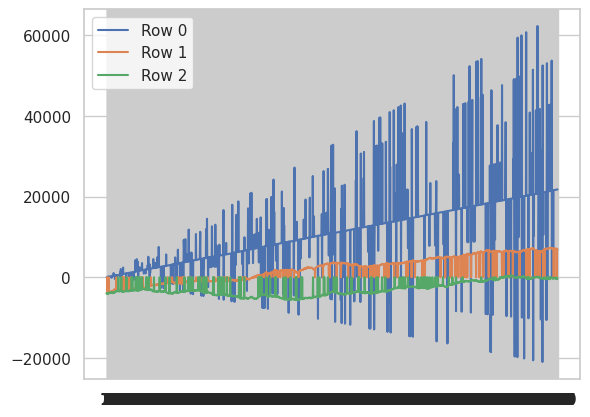

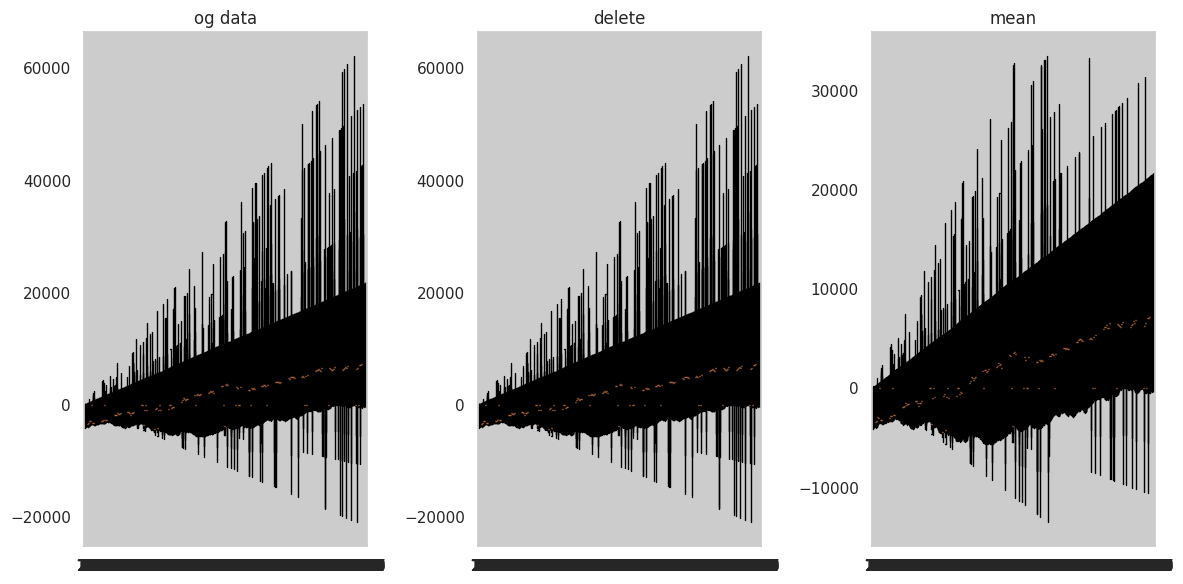

In [76]:
#2

import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/mp1_lr_dataset_ai4032 - mp1_lr_dataset_ai4032.csv.csv"
df = pd.read_csv(path)

dfr = pd.DataFrame(df)

print(dfr.head())

import numpy as np

column_array = np.array(df.columns).reshape(-1, 1)
print("\n\n")
print(column_array)

import matplotlib.pyplot as plt

for index, row in df.iterrows():
    plt.plot(row, label=f"Row {index}")
plt.legend()
plt.show()


dfr_original = dfr.copy()

#روش اول
Q1 = dfr.quantile(0.25)
Q3 = dfr.quantile(0.75)
IQR = Q3 - Q1
dfr_clean1 = dfr[~((dfr < (Q1 - 1.5 * IQR)) | (dfr > (Q3 + 1.5 * IQR))).any(axis=1)]

# روش دوم
def replace_outliers_with_row_mean(row):
    Q1 = row.quantile(0.25)
    Q3 = row.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (row < (Q1 - 1.5 * IQR)) | (row > (Q3 + 1.5 * IQR))
    row[is_outlier] = row.mean()
    return row

dfr_clean2 = dfr.apply(replace_outliers_with_row_mean, axis=1)

# رسم نمودار مقایسه
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('og data')
plt.boxplot(dfr_original.dropna().values)

plt.subplot(1, 3, 2)
plt.title('delete')
plt.boxplot(dfr_clean1.dropna().values)

plt.subplot(1, 3, 3)
plt.title('mean')
plt.boxplot(dfr_clean2.dropna().values)

plt.tight_layout()
plt.show()
